In [ ]:
import tensorflow as tf
import numpy as np
from keras import layers
from keras.regularizers import l2
from keras import initializers
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K
import tf.keras

In [ ]:
'''Important Libraries and Modules that would be used throughout the task are imported'''
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import LeakyReLU
from keras.layers import Lambda
from keras.layers import Activation
from keras.layers import Multiply
from keras.layers import GlobalAveragePooling1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from keras.models import load_model
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading of Data in Pandas DataFrame from CSV file
#Other Features were removed from the CSV as they are not used in the tasks 
data=pd.read_csv("/content/drive/MyDrive/IIIT_MIDAS/flipkart_com-ecommerce_sample.csv", encoding= 'unicode_escape')
print(len(data))
data.head()

20000


,product_category_tree,description,brand
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [ ]:
data.description[0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [ ]:
#Text Preprocessing
category=[]
description=[]
for i in range(len(data)):
  if type(data['description'][i]) == str :
    category.append(data["product_category_tree"][i].split('>>')[0][2:-1]) #Primary Category is being extracted from the product category tree
    des = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    des = re.sub('[/(){}\[\]\|@,.;_]', ' ', des) #Removing the symbols that are not useful in classification task
    des = des.lower() #Converting the text into lowercase 
    description.append(des) 

data = pd.DataFrame()
data["category"]=category
data["description"]=description
data.head()    


,category,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish co...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...


Total No. of Categories : 266


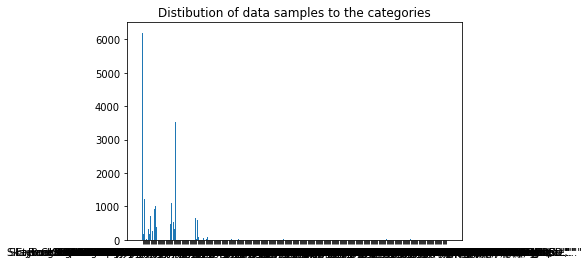

In [ ]:
# Distibution of data samples to the categories
category_counts= Counter(category)
print(f"Total No. of Categories :",len(category_counts.keys()))
plt.bar(category_counts.keys(),category_counts.values() )
plt.title(label='Distibution of data samples to the categories')
plt.show() 

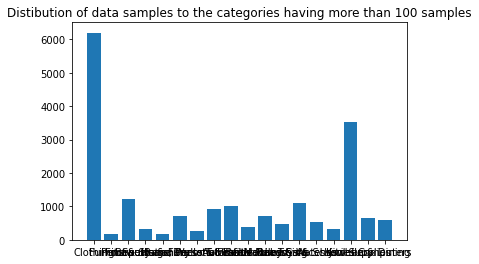

In [ ]:
#only keeping the categories with more than 100 samples
new_dict={}
for key, value in category_counts.items():
  if value>100:
    new_dict[key]=value
plt.bar(new_dict.keys(),new_dict.values())
plt.title(label='Distibution of data samples to the categories having more than 100 samples')
plt.show() 

In [ ]:
new_dict

{'Automotive': 1012,
 'Baby Care': 483,
 'Bags, Wallets & Belts': 265,
 'Beauty and Personal Care': 710,
 'Clothing': 6197,
 'Computers': 578,
 'Footwear': 1227,
 'Furniture': 180,
 'Home Decor & Festive Needs': 929,
 'Home Furnishing': 699,
 'Jewellery': 3531,
 'Kitchen & Dining': 647,
 'Mobiles & Accessories': 1099,
 'Pens & Stationery': 313,
 'Sports & Fitness': 166,
 'Tools & Hardware': 391,
 'Toys & School Supplies': 330,
 'Watches': 530}

In [ ]:
#Storing the description and category having more than 100 instances in dataframe
new_description=[]
new_category=[]
for i in range(len(description)):
  if category[i] in new_dict.keys():
    new_description.append(description[i])
    new_category.append(category[i])
    
new_df=pd.DataFrame()
new_df["description"]=new_description
new_df["category"]=new_category
new_df.head()

,description,category
0,key features of alisha solid women s cycling s...,Clothing
1,fabhomedecor fabric double sofa bed finish co...,Furniture
2,key features of aw bellies sandals wedges heel...,Footwear
3,key features of alisha solid women s cycling s...,Clothing
4,key features of alisha solid women s cycling s...,Clothing


In [ ]:
#Encoding the textual label to the integer labels
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(new_df.category)
new_df['categorical_label'] = lab_enc.transform(new_df.category)
new_df.head()

,description,category,categorical_label
0,key features of alisha solid women s cycling s...,Clothing,4
1,fabhomedecor fabric double sofa bed finish co...,Furniture,7
2,key features of aw bellies sandals wedges heel...,Footwear,6
3,key features of alisha solid women s cycling s...,Clothing,4
4,key features of alisha solid women s cycling s...,Clothing,4


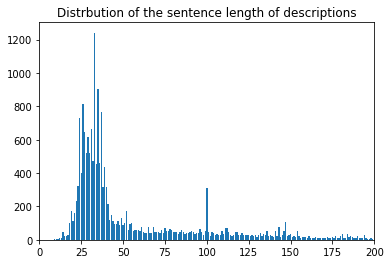

In [ ]:
#analysing the sentence length of the description
df=new_df["description"]
length=[]
for i in range(len(df)) :
  if type(df[i])==str:
    length.append(len(nltk.word_tokenize(df[i])))
c= Counter(length)
plt.bar(c.keys(),c.values())
plt.xlim(0,200)
plt.title(label='Distrbution of the sentence length of descriptions')
plt.show() 

In [ ]:
#Splitting the dataset into training, testing and validation data
X_train, X_test, y_train, y_test = train_test_split(new_df["description"], new_df["categorical_label"], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
#defining the one hot matrix for converting the label to one hot encoded form
labels = sorted(list(set(y_train)))
one_hot = np.zeros((len(labels), len(labels)), int)
np.fill_diagonal(one_hot, 1)
label_dict = dict(zip(labels, one_hot))

In [ ]:
#Converting the labels to one hot encoding
y_train = np.eye(len(label_dict))[y_train]
y_test = np.eye(len(label_dict))[y_test]
y_val = np.eye(len(label_dict))[y_val]

In [ ]:
#Fitting the tokenizer on the trainig dataset 
sent_length=128
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
voc_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", voc_size)


Vocabulary Size: 16399


In [ ]:
#Converting the Description in the training data to the tokens 
sequences = tokenizer.texts_to_sequences(X_train)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_train=np.array(embedded_docs)

In [ ]:
#Converting the Description in the testing data to the tokens 
sequences = tokenizer.texts_to_sequences(X_test)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_test=np.array(embedded_docs)    

In [ ]:
#Converting the Description in the validation data to the tokens 
sequences = tokenizer.texts_to_sequences(X_val)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_val=np.array(embedded_docs)  

In [ ]:

class CapsuleNorm(layers.Layer):
    """
    inputs: shape=[None, num_vectors, dim_vector]
    output: shape=[None, num_vectors]
    """
    def call(self, inputs, **kwargs):
        return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]

    def get_config(self):
        config = super(Length, self).get_config()
        return config


In [ ]:

class Routing(layers.Layer):

    def __init__(self, num_capsule,
                 dim_capsule,
                 routing=False,
                 num_routing=3,
                 l2_constant=0.0001,
                 kernel_initializer='glorot_uniform', **kwargs):

        super(Routing, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routing = routing
        self.num_routing = num_routing
        self.l2_constant = l2_constant
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):

        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # Transform matrix
        self.W = self.add_weight(shape=[self.num_capsule, self.input_num_capsule,
                                        self.dim_capsule, self.input_dim_capsule],
                                 initializer=self.kernel_initializer,
                                 regularizer=l2(self.l2_constant),
                                 name='capsule_weight')
        self.built = True

    def call(self, inputs, training=True):

        inputs_expand = K.expand_dims(inputs, 1)
        inputs_tiled = K.tile(inputs_expand, [1, self.num_capsule, 1, 1])

        # inputs_hat.shape = [None, num_capsule, input_num_capsule, upper capsule length]
        inputs_hat = K.map_fn(lambda x: K.batch_dot(x, self.W, [2, 3]), elems=inputs_tiled)
        inputs_hat = K.sum(inputs_hat,axis=-1)

        # dynamic routing
        if self.routing:
            b = tf.zeros(shape=[K.shape(inputs_hat)[0], self.num_capsule, self.input_num_capsule])

            for i in range(self.num_routing):
                # c shape = [batch_size, num_capsule, input_num_capsule]
                c = tf.keras.activations.softmax(b, axis=1)
                # outputs = [batch_size, num_classes, upper capsule length]
                outputs = squash(K.batch_dot(c, inputs_hat, [2, 2]))

                if i < self.routing - 1:
                    b += K.batch_dot(outputs, inputs_hat, [2, 3])

        # static routing
        else:
            # outputs = [batch_size, num_classes, upper capsule length]
            outputs = K.sum(inputs_hat, axis=2)
            outputs = squash(outputs)
        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])

    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routing': self.routing,
            'num_routing': self.num_routing,
            'l2_constant': self.l2_constant
        }
        base_config = super(Routing, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))



In [ ]:

def squash(vectors, axis=-1):
    """
    The non-linear activation used in Capsule. It drives the length of a large vector to near 1 and small vector to 0
    :param vectors: some vectors to be squashed, N-dim tensor
    :param axis: the axis to squash
    :return: a Tensor with same shape as input vectors
    """
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors


In [ ]:
def margin_loss(y_true, y_pred):

    """
    :param y_true: [None, n_classes]
    :param y_pred: [None, num_capsule]
    :return: a scalar loss value.
    """
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))

    return K.mean(K.sum(L, 1))


In [ ]:
    input_tokens = layers.Input((128,))
    embedding=Embedding(voc_size,100,input_length=sent_length)(input_tokens)

    embedding = layers.Lambda(lambda x: K.expand_dims(x, axis=-1))(embedding)

    # non-linear gate layer
    elu_layer = layers.Conv2D(256, kernel_size=(3, 100),
                              use_bias=False,
                              kernel_regularizer=l2(0.), activation=None)(embedding)
    elu_layer = layers.BatchNormalization()(elu_layer)
    elu_layer = layers.Activation('elu')(elu_layer)

    conv_layer = layers.Conv2D(256, kernel_size=(3,100),
                               use_bias=False,
                               kernel_regularizer=l2(0.), activation=None)(embedding)
    conv_layer = layers.BatchNormalization()(conv_layer)

    gate_layer = layers.Multiply()([elu_layer, conv_layer])

    # dropout
    gate_layer = layers.Dropout(0.1)(gate_layer)

    # convolutional capsule layer
    h_i = layers.Conv2D(6*10,
                        kernel_size=(K.int_shape(gate_layer)[1], 1),
                        use_bias=False,
                        kernel_regularizer=l2(0.), activation=None)(gate_layer)
    h_i = layers.Reshape((6, 10))(h_i)
    h_i = layers.BatchNormalization()(h_i)

    h_i = layers.Activation('relu')(h_i)

    # dropout
    h_i = layers.Dropout(0.1)(h_i)

    # routing algorithm
    text_caps = Routing(num_capsule=18,
                        l2_constant=0.,
                        dim_capsule=16,
                        routing=False,
                        num_routing=3)(h_i)

    output = CapsuleNorm()(text_caps)

    model = Model(input_tokens, output, name='text-capsnet')

    model.summary()

    # compile model
    model.compile(loss=[margin_loss], optimizer=Adam(0.001, beta_1=0.7, beta_2=0.999, amsgrad=True),
                  metrics=['accuracy'])

Model: "text-capsnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 128, 100)     1639900     input_9[0][0]                    
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 128, 100, 1)  0           embedding_7[0][0]                
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 126, 1, 256)  76800       lambda_7[0][0]                   
_______________________________________________________________________________________

In [ ]:
model.fit(X_train, y_train, batch_size=40, epochs=10)

Epoch 1/10
338/338 [==============================] - 142s 413ms/step - loss: 0.3540 - accuracy: 0.6217
Epoch 2/10
338/338 [==============================] - 140s 414ms/step - loss: 0.1032 - accuracy: 0.9083
Epoch 3/10
338/338 [==============================] - 140s 414ms/step - loss: 0.0728 - accuracy: 0.9499
Epoch 4/10
338/338 [==============================] - 139s 412ms/step - loss: 0.0639 - accuracy: 0.9594
Epoch 5/10
338/338 [==============================] - 139s 411ms/step - loss: 0.0574 - accuracy: 0.9669
Epoch 6/10
338/338 [==============================] - 141s 416ms/step - loss: 0.0563 - accuracy: 0.9674
Epoch 7/10
338/338 [==============================] - 140s 415ms/step - loss: 0.0526 - accuracy: 0.9697
Epoch 8/10
338/338 [==============================] - 141s 416ms/step - loss: 0.0501 - accuracy: 0.9766
Epoch 9/10
338/338 [==============================] - 139s 412ms/step - loss: 0.0485 - accuracy: 0.9781
Epoch 10/10
338/338 [==============================] - 141s 418m

In [ ]:
#Testing the Capsnet model on test dataset
print("FOR Capsnet MODEL")
#saved_model=load_model('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'Multi_CNN.hdf5')
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
y_test = np.argmax(y_test,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR Capsnet MODEL
Accuracy: 0.951607
Precision: 0.866211
Recall: 0.867769
F1 score: 0.857463
